In [1]:
import pandas as pd
from pycaret.regression import *

In [56]:
df = pd.read_csv("/work/etl_used_mansion.csv")

In [57]:
# ２億以上の物件を除外
df = df[df['price'] < 200000000]

In [58]:
df.head()

,price,occupancy_area,room_layout,address,management_expenses,reserve_fund_for_repairs,building_structure,total_number_of_houses,parking,bike_parking,...,land_rights,management,rank,floor_number,building_age,route,station,walk_distance,running_cost,parking_cost
0,730000,13.37,ワンルーム,目黒区,2760,7360,ＲＣ,49,NaN,NaN,...,所有権,全部委託・日勤管理,5,2,35,東急東横線,祐天寺駅,5,10120,NaN
1,1500000,36.61,１ＤＫ,小金井市,100937,14400,ＲＣ,176,無,NaN,...,旧法地上権,NaN,5,4,42,ＪＲ中央線,武蔵小金井駅,19,115337,NaN
2,1500000,36.61,１ＤＫ,小金井市,100937,14400,ＲＣ,50,無,NaN,...,旧法地上権,全部委託・常駐管理,5,4,43,ＪＲ中央線,武蔵小金井駅,19,115337,NaN
3,2000000,36.61,１ＬＤＫ,小金井市,100937,14400,ＲＣ,94,NaN,NaN,...,旧法地上権,全部委託・常駐管理,5,5,43,ＪＲ中央線,武蔵小金井駅,18,115337,NaN
4,2300000,16.34,ワンルーム,青梅市,6300,5190,ＲＣ,47,無,NaN,...,所有権,全部委託・巡回管理,7,5,33,ＪＲ青梅線,東青梅駅,2,11490,NaN


In [59]:
exp1 = setup(df, target = 'price')

,Description,Value
0,session_id,6072
1,Target,price
2,Original Data,"(4990, 21)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3492, 728)"


In [60]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,5446867.0373,83604433560521.1719,9099701.5876,0.8901,0.2318,0.1612,0.2320
et,Extra Trees Regressor,4949196.8629,87727282341441.2656,9281967.1827,0.8863,0.2216,0.1487,5.8630
rf,Random Forest Regressor,5895818.9902,109721626153534.6250,10396605.0542,0.8577,0.2536,0.1818,4.0230
gbr,Gradient Boosting Regressor,7416350.5467,118803615351901.9062,10860864.7622,0.8442,0.2840,0.2248,1.4170
br,Bayesian Ridge,7348869.0905,119575075073374.4062,10892776.8694,0.8430,0.4052,0.2940,5.8800
ridge,Ridge Regression,7382409.1000,120870172570419.2031,10955680.0000,0.8409,0.4557,0.2977,0.1260
llar,Lasso Least Angle Regression,7468014.3592,130108063720387.7188,11334954.8364,0.8296,0.4228,0.2962,0.5920
omp,Orthogonal Matching Pursuit,7983563.2933,137274438317778.0781,11666074.6831,0.8202,0.4350,0.3121,0.0690
lasso,Lasso Regression,7756778.5000,139469812819558.4062,11770875.5000,0.8157,0.4381,0.3166,0.4430
lr,Linear Regression,8484047.5000,154862607348531.1875,12379479.6000,0.7962,0.5163,0.3416,0.3200


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=6072, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [61]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4141021.4286,58035886869057.1406,7618128.8299,0.8876,0.2139,0.1375
1,5547527.1429,140323118380930.1562,11845805.9405,0.8376,0.2327,0.1546
2,5858545.8453,111594759594527.2188,10563842.0849,0.8927,0.2754,0.1991
3,5057593.4097,94395385921518.6250,9715728.7900,0.8676,0.2148,0.1443
4,4523386.1509,69129723521346.7031,8314428.6347,0.8874,0.2322,0.1562
5,4600532.3782,70191862270417.0625,8378058.3831,0.9051,0.2170,0.1435
6,5226407.5454,93890563697653.6094,9689714.3249,0.8871,0.2166,0.1425
7,4374801.8147,59454513665625.6016,7710675.3054,0.9215,0.1958,0.1256
8,5222848.1375,93789099582120.3438,9684477.2488,0.8848,0.2177,0.1474
9,4939304.7755,86467909911216.1719,9298812.2850,0.8911,0.2001,0.1366


In [66]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,11502920.1058,276804957464373.9062,16637456.4602,0.4639,0.4520,0.4239
1,15109666.7196,573488792567157.6250,23947626.0320,0.3364,0.4879,0.4428
2,16420963.9711,675332145790627.6250,25987153.4761,0.3506,0.5718,0.6203
3,13633496.6041,435272694443171.9375,20863189.9393,0.3894,0.4865,0.4563
4,13542515.0695,376783087582893.0000,19410901.2563,0.3862,0.5012,0.5127
5,14695961.9017,457953739925328.5000,21399853.7361,0.3811,0.5604,0.5775
6,15201412.9789,542089210044246.5000,23282809.3246,0.3484,0.4822,0.4292
7,14783752.9449,466547621194537.7500,21599713.4517,0.3837,0.5251,0.5063
8,14588397.5910,496720006905236.8125,22287216.2215,0.3901,0.5084,0.4867
9,13774812.7454,491317033120775.1875,22165672.4040,0.3815,0.4933,0.4809


In [62]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5069374.5307,67639572046027.7109,8224328.0605,0.8690,0.2002,0.1488
1,5991357.1016,123939393775171.4375,11132807.0932,0.8566,0.2296,0.1676
2,6324091.1651,101504471060014.8594,10074942.7323,0.9024,0.3121,0.2240
3,5524266.2550,91410727066751.1250,9560895.7251,0.8718,0.2500,0.1571
4,5273259.9518,68720035148523.9453,8289754.8304,0.8880,0.2107,0.1561
5,5078578.3301,72491619796301.3438,8514201.0662,0.9020,0.2313,0.1481
6,5089343.0285,69386641270863.3125,8329864.4209,0.9166,0.1917,0.1375
7,5285368.3065,74023500160802.0469,8603691.0777,0.9022,0.2176,0.1446
8,5475137.0152,87451572364290.0000,9351554.5427,0.8926,0.2416,0.1636
9,5357894.6881,79476802916466.0156,8914976.3273,0.8999,0.2335,0.1642


In [ ]:
tuned_lightgbm = tune_model(lightgbm)

In [63]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6908538.8784,93930977591055.2188,9691799.5022,0.8181,0.3448,0.2276
1,7837251.8708,160240784296485.3125,12658624.8975,0.8146,0.2781,0.2280
2,8184681.4401,137247999727776.9688,11715289.1440,0.8680,0.3173,0.2892
3,7522427.0758,124329735650173.1562,11150324.4639,0.8256,0.2744,0.2263
4,6726916.1794,85964097153768.0156,9271682.5417,0.8600,0.2617,0.2168
5,7352557.8460,116732796773666.2500,10804295.2928,0.8422,0.2726,0.2227
6,7707591.8335,120492057681178.7500,10976887.4314,0.8552,0.2471,0.2015
7,7327642.0853,105779091072824.7969,10284896.2597,0.8603,0.2663,0.2074
8,7421187.8776,126842230492429.9844,11262425.6043,0.8443,0.2831,0.2221
9,7174710.3802,116476383079660.4688,10792422.4843,0.8534,0.2946,0.2065


In [67]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5039388.2717,63092109918705.0625,7943054.1934,0.8778,0.2112,0.1546
1,5967651.0364,127969266126760.7812,11312350.1593,0.8519,0.2497,0.1793
2,5863430.7902,92379029266805.6406,9611401.0044,0.9112,0.2817,0.2521
3,5345076.1071,78414558656202.7969,8855199.5266,0.8900,0.2353,0.1551
4,5004628.5434,71145475578297.7031,8434777.7433,0.8841,0.2132,0.1588
5,5311989.1589,67149158332101.2969,8194459.0018,0.9093,0.2555,0.1724
6,6009799.2737,99038952662422.4688,9951831.6235,0.8810,0.1997,0.1487
7,5427008.9884,71014839634652.5781,8427030.2975,0.9062,0.3374,0.1518
8,5638526.5870,88592731567396.5781,9412371.1979,0.8912,0.2323,0.1570
9,5502659.2893,94762291945170.3906,9734592.5413,0.8807,0.2426,0.1467


In [64]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5078065.0261,77320400091194.7812,8793201.9249,0.8503,0.2302,0.1581
1,6736200.6848,165263936044047.8438,12855502.1700,0.8088,0.2585,0.1842
2,6930041.5473,134512078941690.5469,11597934.2532,0.8707,0.2897,0.2221
3,5748265.6502,110113346282599.2188,10493490.6624,0.8455,0.2444,0.1695
4,4945641.6905,69009493356059.6484,8307195.2761,0.8876,0.2712,0.2017
5,5789171.1784,106040699890321.7344,10297606.5127,0.8567,0.2355,0.1678
6,5985817.3830,113105645688177.3281,10635113.8070,0.8640,0.2339,0.1621
7,5565032.9513,89566911999932.0469,9463979.7126,0.8817,0.2411,0.1612
8,6357143.3324,128736792254203.2969,11346223.7002,0.8419,0.2607,0.1884
9,5822810.4585,103546956987119.8125,10175802.5230,0.8696,0.2707,0.2031


In [68]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9673454.2328,198846736656989.0000,14101302.6582,0.6149,0.4011,0.3614
1,13109631.1111,450316945962596.5000,21220672.6086,0.4789,0.4299,0.3813
2,14419742.5448,527626771695166.6875,22970127.8119,0.4926,0.5023,0.5154
3,11668787.4350,331314962465582.6875,18202059.2919,0.5352,0.4278,0.3856
4,11538684.9199,279881328379375.0938,16729654.1620,0.5440,0.4473,0.4453
5,12583650.9604,346131635404406.4375,18604613.2829,0.5322,0.4948,0.4827
6,12928146.6624,393803048168122.9375,19844471.4762,0.5267,0.4172,0.3632
7,12481641.4093,327334171224938.1875,18092378.8161,0.5676,0.4563,0.4213
8,12612597.2620,384288527771549.8750,19603278.4955,0.5281,0.4478,0.4132
9,11859573.7026,370942439818161.6250,19259866.0384,0.5330,0.4385,0.4198


In [65]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4561793.9940,58105488559545.4062,7622695.6229,0.8875,0.1877,0.1344
1,5944107.2876,120761415684400.1094,10989149.9073,0.8603,0.2280,0.1672
2,6092098.8617,98041514457683.2500,9901591.5114,0.9057,0.2684,0.2210
3,5507224.2882,96684959329857.8281,9832851.0275,0.8644,0.2896,0.1524
4,4698843.6918,61389698031494.5938,7835157.8179,0.9000,0.1899,0.1358
5,4925883.7363,66014709784234.8125,8124943.6788,0.9108,0.1910,0.1373
6,5098916.6539,75454250827011.3125,8686440.6305,0.9093,0.1908,0.1360
7,5067999.3332,66566485615114.3281,8158828.6914,0.9121,0.1925,0.1352
8,5501643.9577,84243319026655.8906,9178415.9323,0.8966,0.2091,0.1543
9,5077290.8261,68116045306238.5547,8253244.5321,0.9142,0.1969,0.1414


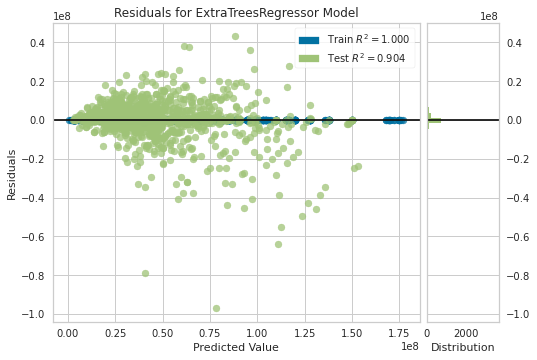

In [69]:
plot_model(et)

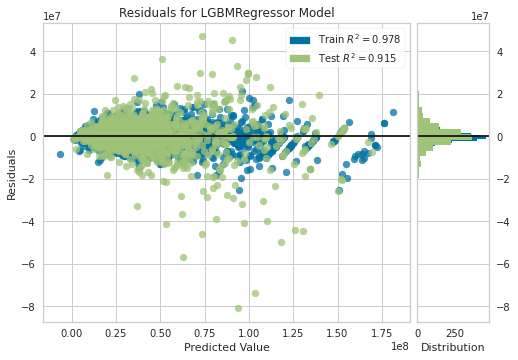

In [70]:
plot_model(tuned_lightgbm)

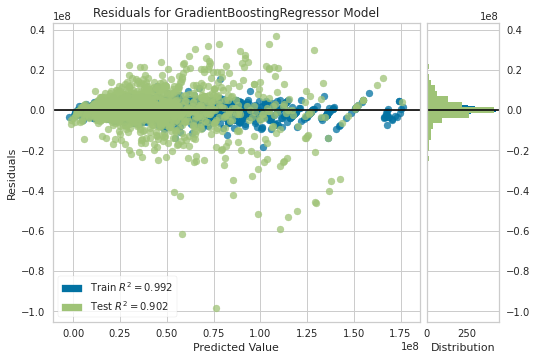

In [71]:
plot_model(tuned_gbr)

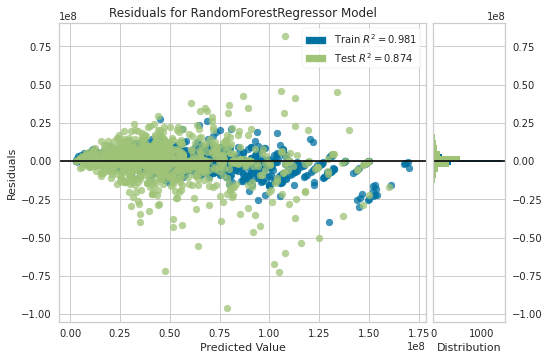

In [72]:
plot_model(rf)

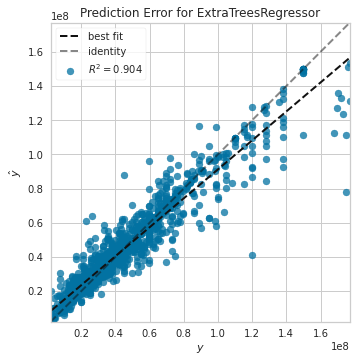

In [73]:
plot_model(et, plot='error')

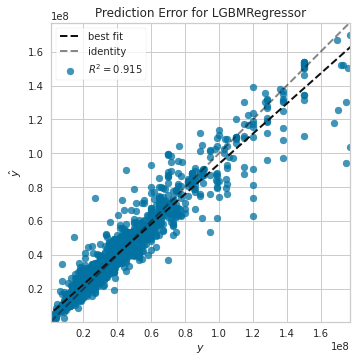

In [74]:
plot_model(tuned_lightgbm, plot='error')

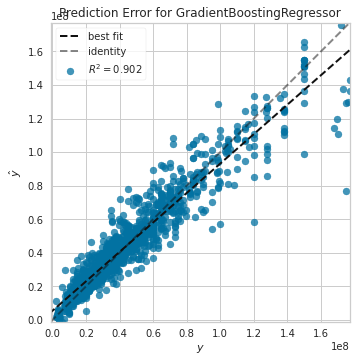

In [75]:
plot_model(tuned_gbr, plot='error')

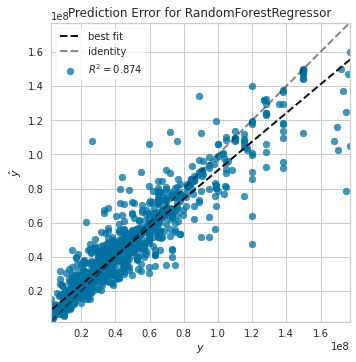

In [77]:
plot_model(rf, plot='error')

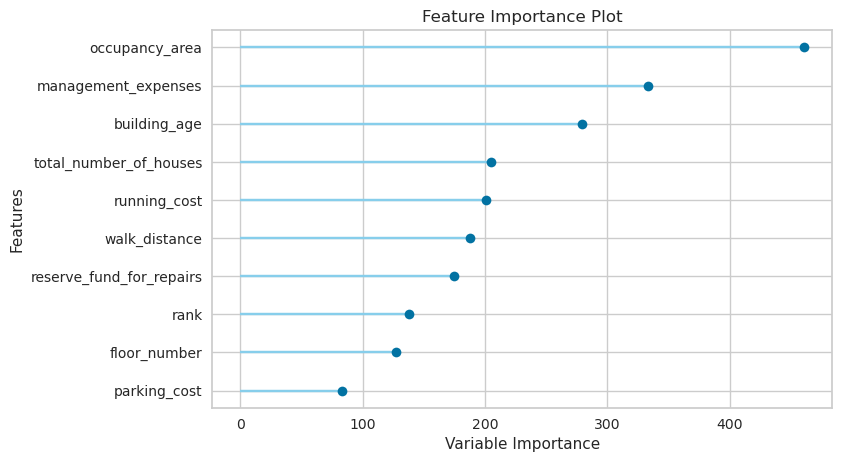

In [78]:
plot_model(tuned_lightgbm, plot='feature')

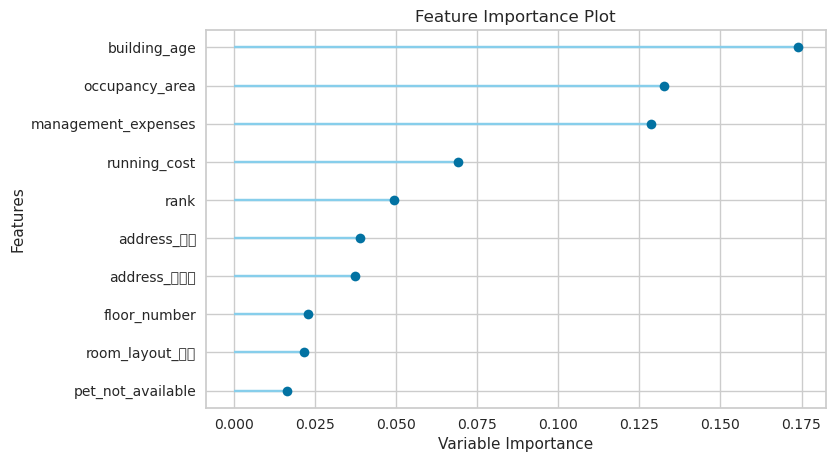

In [79]:
plot_model(et, plot='feature')

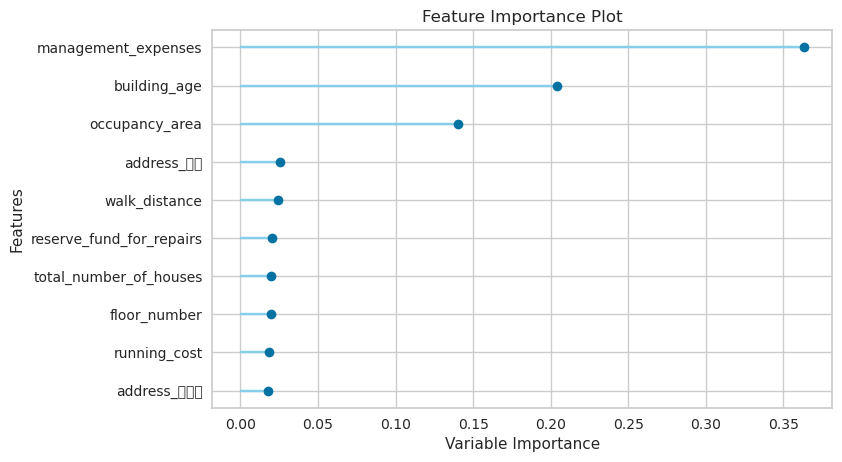

In [80]:
plot_model(rf, plot='feature')

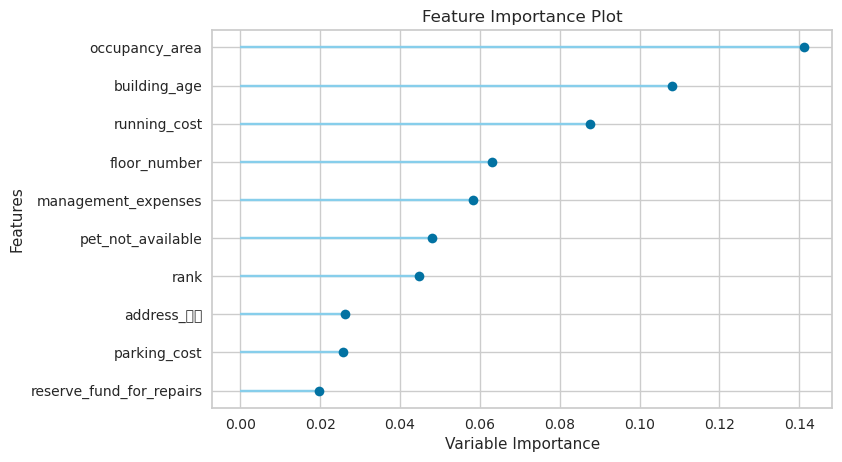

In [81]:
plot_model(tuned_gbr, plot='feature')

In [82]:
ensemble = blend_models([tuned_lightgbm, et, tuned_gbr, rf])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4256181.9647,54066148704935.8750,7352968.7001,0.8953,0.1919,0.1317
1,5548308.5871,122477342824662.1250,11066948.2164,0.8583,0.2251,0.1574
2,5692320.5667,92423042388552.1250,9613690.3626,0.9111,0.2602,0.2049
3,4921397.7573,81879413116837.2969,9048724.3917,0.8851,0.2254,0.1398
4,4279049.5031,53256085903250.7969,7297676.7470,0.9132,0.2077,0.1455
5,4708524.1211,64710676688314.5312,8044294.6669,0.9126,0.1991,0.1395
6,5043504.8903,79595232655420.6094,8921616.0338,0.9043,0.1923,0.1322
7,4651558.0277,58557247860621.2734,7652270.7650,0.9227,0.1842,0.1269
8,5080784.0452,82853288693115.5000,9102378.1889,0.8983,0.2055,0.1453
9,4740185.4653,72772337445883.9062,8530670.3984,0.9084,0.2005,0.1390


In [83]:
final_model = finalize_model(ensemble)

In [84]:
save_model(final_model, model_name='used_mansion_price_predict')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                     criterion='mse',
                                                                     max_depth=None,
                                                                     max_features='auto',
                                                    

In [92]:
bdf = pd.read_csv("/work/mansion.csv")

In [93]:
bdf = bdf.iloc[:, 2:]

In [94]:
predict_model(final_model, data=bdf)

,occupancy_area,room_layout,address,management_expenses,reserve_fund_for_repairs,building_structure,total_number_of_houses,parking,bike_parking,pet,...,management,rank,floor_number,building_age,route,station,walk_distance,running_cost,parking_cost,Label
0,72.13,３ＬＤＫ,江戸川区,11200,14400,ＳＲＣ,78,有,有,NaN,...,全部委託・日勤管理,11,3,46,東京メトロ東西線,西葛西駅,7,25600,20000,3.812494e+07
